# Regression

In [1]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn import linear_model, svm
from sklearn.model_selection import cross_val_score

In [2]:
#Load Dataframe
df = pd.read_csv('train.csv')

In [3]:
#Check datatypes
df.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [4]:
#Change 'Kitchen Qual' from strings to integers so the feature can be used in models with function
def kitchenquality(cell):
    if cell == 'Ex':
        return 5
    elif cell == 'Gd': 
        return 4
    elif cell == 'TA':
        return 3
    elif cell == 'Fa':
        return 2
    elif cell == 'Po':
        return 1
    else:
        pass
    


In [5]:
#Change 'Exterior Condition' from strings to integers for consideration in the model
def exterquality(cell):
    if cell == 'Ex':
        return 5
    elif cell == 'Gd': 
        return 4
    elif cell == 'TA':
        return 3
    elif cell == 'Fa':
        return 2
    elif cell == 'Po':
        return 1
    else:
        pass
    

In [6]:
def bsmtquality (cell):
    if cell == 'Ex':
        return 5
    elif cell == 'Gd': 
        return 4
    elif cell == 'TA':
        return 3
    elif cell == 'Fa':
        return 2
    elif cell == 'Po':
        return 1
    elif cell == 'NA':
        return 0
    else:
        pass
    

In [7]:
def garagecondition (cell):
    if cell == 'Ex':
        return 5
    elif cell == 'Gd': 
        return 4
    elif cell == 'TA':
        return 3
    elif cell == 'Fa':
        return 2
    elif cell == 'Po':
        return 1
    elif cell == 'NA':
        return 0
    else:
        pass
    

In [8]:
#Apply function
df['Kitchen Qual'] = df['Kitchen Qual'].map(kitchenquality)
df['Exter Qual']=df['Exter Qual'].map(exterquality)
df['Bsmt Qual']=df['Bsmt Qual'].map(bsmtquality)

In [9]:
#See where null values are located and how many are there
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual

In [10]:
#Drop some null values for Mas Vnr Type, Mas Vnr Area, Garage Cars, and Garage Area
df= df.dropna(axis=0, subset = [['Mas Vnr Type','Mas Vnr Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', 'Bsmt Qual']])

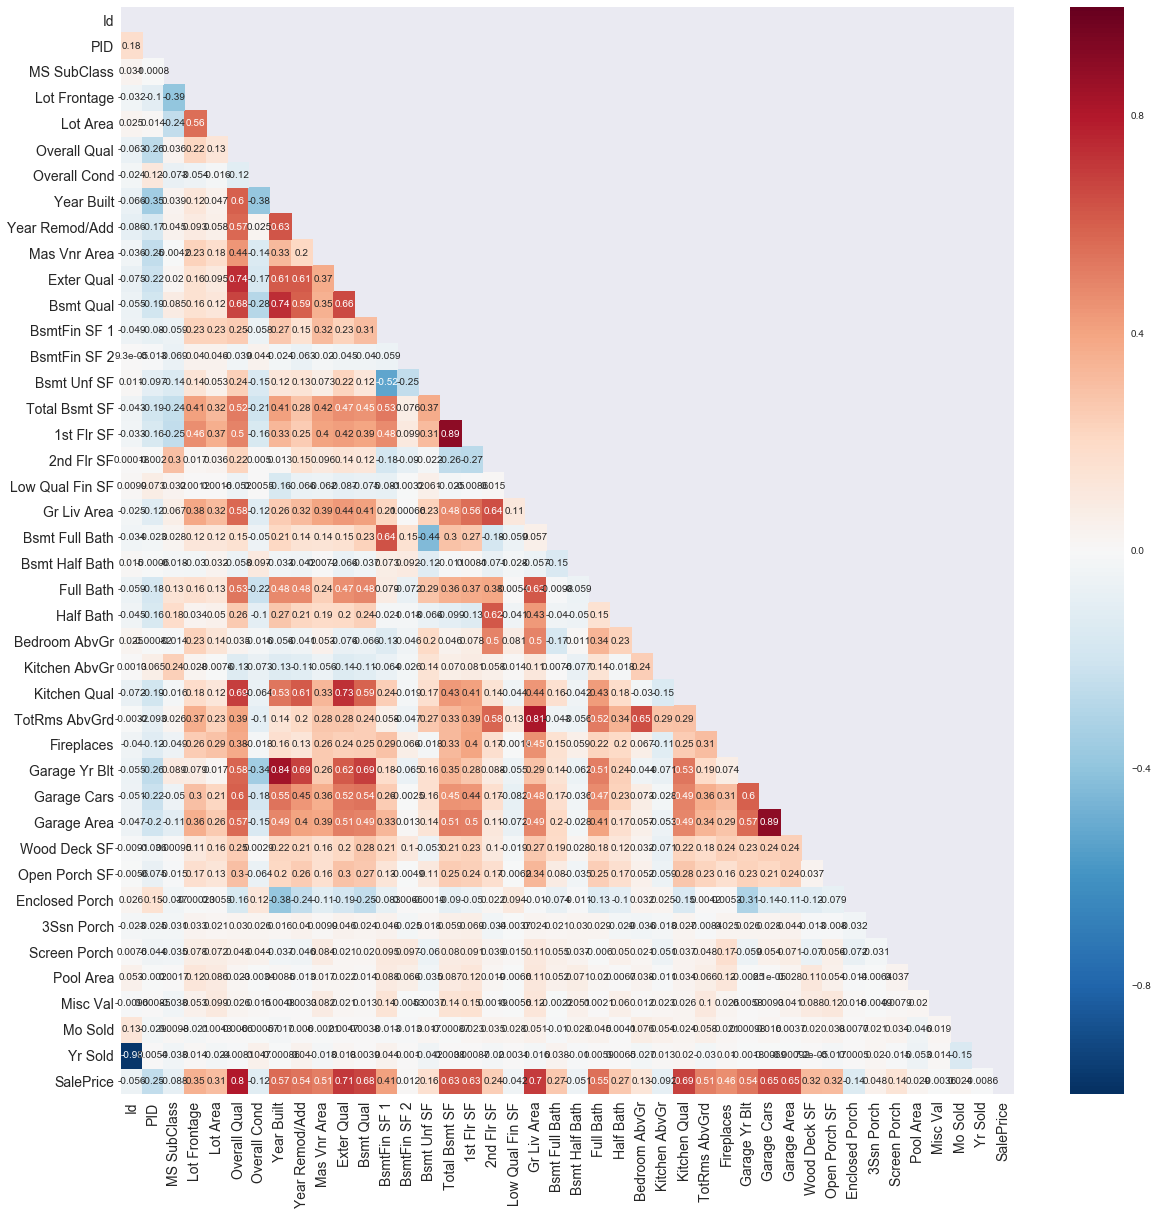

In [11]:
#Correlation matrix/heatmap

df_corr = df.corr()
fix, ax = plt.subplots(figsize=(20,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()

In [12]:
#Look at column names
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [13]:
df_housestyle=pd.get_dummies(df[['House Style', 'MS SubClass','MS Zoning', 'Lot Config', 'Functional']])

In [14]:
df = pd.concat([df, df_housestyle], axis=1)

In [15]:
df['SalePrice'].corr(df['Lot Config_FR3'])

0.024725826033954318

In [58]:
#Assign variables
X = df[['Year Built','Mas Vnr Area','Year Remod/Add','Garage Cars','Full Bath',
        'Overall Qual','Gr Liv Area', 'TotRms AbvGrd','1st Flr SF', 
        'Garage Area', 'Total Bsmt SF', 'Kitchen Qual', 'Overall Cond', 'Exter Qual']]
y= df[ 'SalePrice']

In [17]:
#Check for null values
X.isnull().sum()

Year Built        0
Mas Vnr Area      0
Year Remod/Add    0
Garage Cars       0
Full Bath         0
Overall Qual      0
Gr Liv Area       0
TotRms AbvGrd     0
1st Flr SF        0
Garage Area       0
Total Bsmt SF     0
Kitchen Qual      0
Overall Cond      0
Exter Qual        0
dtype: int64

In [69]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [19]:
#Model 1- Logistic Regression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
cross_val_score(log, X_test, y_test).mean()

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.015282303397549496

In [21]:
#Model-2: Random Forest
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [22]:
cross_val_score(rfr,X_test,y_test).mean()

0.84607972682913335

In [24]:
#Model-3: Random Forest with GridSearch
param_grid = {'n_estimators': [5,10,20,50,75],
              'max_features':['auto','sqrt', 'log2']
             }
gs = GridSearchCV(rfr,param_grid=param_grid,cv=3, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 50, 75], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [25]:
gs.score(X_test,y_test)

0.87681581787339202

In [27]:
#Model #4 : Random Forest with GridSearch and AdaBoost
c

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.6s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.9s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.0s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.5s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.5s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.1s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.2s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.9s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.2s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.0s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.9s finished



[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] ............... max_features=auto, n_estimators=75, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.8s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.8s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.3s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.3s finished



Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.1s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] ............... max_features=auto, n_estimators=75, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.8s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.1s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.9s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.8s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.6s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.6s finished


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] ............... max_features=auto, n_estimators=75, total=   0.3s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.6s finished



Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.2s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.6s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.9s finished



[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.8s finished



[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] ............... max_features=auto, n_estimators=75, total=   0.3s
[CV] m

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.2s
[CV] max_features=auto, n_estimators=75 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=auto, n_estimators=5 ...............................
[CV] ................ max_features=auto, n_estimators=5, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=10 ..............................
[CV] ............... max_features=auto, n_estimators=10, total=   0.0s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] max_features=auto, n_estimators=20 ..............................
[CV] ............... max_features=auto, n_estimators=20, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.7s finished


AdaBoostRegressor(base_estimator=GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_frac...       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [28]:
rfgsada.score(X_test, y_test)

0.88379943670367511

In [29]:
#Model #5: GradientBoostingRegressor with Gridsearch
gba = GradientBoostingRegressor() 
gba_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None],
    'max_leaf_nodes': [2,3,None],
    'learning_rate': [0.1,0.3,0.5]
}
gba_model = GridSearchCV(gba, param_grid=gba_params)
gba_model.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5), 'max_features': ['auto', 'log2', None], 'max_leaf_nodes': [2, 3, None], 'learning_rate': [0.1, 0.3, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
gba_model.best_params_

In [30]:
gba_model.score(X_test, y_test)

0.88267813336823631

In [50]:
##6: Supermodel GradientBoostingRegressor with Gridsearch parameters and AdaBoost. Might break co
Adagba = AdaBoostRegressor(gba_model)


In [71]:
#Fit highest scoring model on all training data
y_1 = Adagba.fit(X,y)

In [61]:
#Import Test set
test = pd.read_csv('test.csv')

In [62]:
#Modify KitchenQuality in the test set
test['Kitchen Qual'] = test['Kitchen Qual'].map(kitchenquality) 
test['Exter Qual']=test['Exter Qual'].map(exterquality)


In [63]:
test['Bsmt Qual']=test['Bsmt Qual'].map(bsmtquality)

In [64]:
test['Kitchen Qual'].map(kitchenquality)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
849    None
850    None
851    None
852    None
853    None
854    None
855    None
856    None
857    None
858    None
859    None
860    None
861    None
862    None
863    None
864    None
865    None
866    None
867    None
868    None
869    None
870    None
871    None
872    None
873    None
874    None
875    None
876    None
877    None
878    None
Name: Kitchen Qual, Length: 879, dtype: object

In [65]:
#Setup X variable
X_test = test[['Year Built','Mas Vnr Area','Year Remod/Add','Garage Cars','Full Bath',
        'Overall Qual','Gr Liv Area', 'TotRms AbvGrd','1st Flr SF', 
        'Garage Area', 'Total Bsmt SF', 'Kitchen Qual', 'Overall Cond', 'Exter Qual']]

In [66]:

X_test= X_test.dropna(axis=0, subset = [['Mas Vnr Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF']])

In [38]:
X_test.isnull().sum()

Year Built        0
Mas Vnr Area      0
Year Remod/Add    0
Garage Cars       0
Full Bath         0
Overall Qual      0
Gr Liv Area       0
TotRms AbvGrd     0
1st Flr SF        0
Garage Area       0
Total Bsmt SF     0
Kitchen Qual      0
Overall Cond      0
Exter Qual        0
dtype: int64

In [39]:
X_test.dtypes

Year Built          int64
Mas Vnr Area      float64
Year Remod/Add      int64
Garage Cars       float64
Full Bath           int64
Overall Qual        int64
Gr Liv Area         int64
TotRms AbvGrd       int64
1st Flr SF          int64
Garage Area       float64
Total Bsmt SF     float64
Kitchen Qual        int64
Overall Cond        int64
Exter Qual          int64
dtype: object

In [1]:
y=gba_model.predict(X_test)

NameError: name 'gba_model' is not defined

In [2]:
kaggle = pd.concat([pd.DataFrame(test['Id']), pd.DataFrame(y)], axis=1)
kaggle.head()
kaggle.columns = ['Id', 'SalePrice']
kaggle.shape
kaggle

NameError: name 'pd' is not defined

In [74]:
kaggle = kaggle.fillna(kaggle.mean())


In [75]:
kaggle.to_csv('submission28.csv',index=False)

# Classification

In [ ]:
#Load training data
dfc = pd.read_csv('train.csv')

In [ ]:
#Change Sale Condition from categorical variable to numerical variable,0s for not abnormal and 1s for abnormal
def saleconditioner(cell):
    if cell == 'Abnorml':
        return 1
    else: 
        return 0

In [ ]:

dfc['Sale Condition'] = dfc['Sale Condition'].map(saleconditioner) 

In [ ]:
#Setup Variables
Xc = dfc[['Yr Sold']].values
yc= dfc['Sale Condition']

In [ ]:
#Train-Test-Split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc)

In [ ]:
#Model-RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
cross_val_score(rfc,Xc_train,yc_train)

In [ ]:
#Gridsearch-Random Forest Classifier
param_grid = {'criterion':['entropy','gini']}
gs = GridSearchCV(rfc,param_grid=param_grid,cv=3, verbose=2)
gs.fit(Xc_train,yc_train)

In [ ]:
#fit to data
gs.fit(Xc,yc)

In [ ]:
#Create X variable
Xc_test = test[['Yr Sold']].values

In [ ]:
#predict Y
preds = gs.predict(Xc_test)

In [ ]:
#Prepare submission
submission = test[['Id']].copy()
submission['Sale Condition'] = preds
submission

In [ ]:
#Make submission a CSV file
submission.to_csv('submissionc4.csv',index=False)